<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다중회귀 - 수치화 시킬 data가 여러개 일때 (지금까지는 두개만 갖고 했음)

특성공학 - 여러 특성을 사용한 다중회귀
ex)
- 농어의 무게를 어느정도 짐작할 수는 있다.
- 단 과소 적합이 발생할 수 있고, 이 경우 제곱보다 고차항으로 가야한다 -> 길이 + 무게 + 높이 + 두께 + ...



In [2]:
# 이번에는 농어의 길이뿐만 아니라 높이와 두께도 포함하자
# 3개의 특성을 제곱하여 추가
# 각 특성을 서로 곱해서 또 다른 특성을 만들 수 있다
# 특성공학: 이 특성들을 활용해서 새로운 특성을 만드는 것

In [6]:
# data부터 준비하기(with dataframe from pandas; data 분석용 library)
# csv파일을 배열로 만들자
# 이거는 input
import pandas as pd # pandas의 관례적 별칭
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full) # 길이, 무게, 넓이

# 이거는 test
import numpy as np
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

print(train_input[0]) # 길이, 높이, 두께
print(train_target[0]) # 무게

[19.6   5.14  3.04]
85.0


In [25]:
# 다음 4개의 data로 새로운 특성 만들기
# sklearn의 변환기(transformer): 특성을 만들거나 전처리 시행 - fit(), transform()

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

poly.fit([[2, 3]]) # 2개의 특성을 가진 3으로 이루어진 샘플 하나 적용
print(poly.transform([[2, 3]]))
# 훈련을 해야 변환이 된다

[[1. 2. 3. 4. 6. 9.]]


In [16]:
# [[1. 2. 3. 4. 6. 9.]]
# 1 (bias), 2, 3,
# 4 = 2**2, 6 = 2 * 3, 9 = 3 **2

# PolynomialFeatures는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곺한 항을 추가함
# 무게 = a * 길이 + b * 높이 + c * 두께 + d + 1
# 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수(길이, 높이, 두께 1)

In [27]:
poly = PolynomialFeatures(include_bias=False) # 1 삭제하기
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [29]:
poly.get_feature_names_out()
#[첫번째 (2), 두번째 (3), 첫번째의 제곱(2^2)]

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [32]:
# 실제 훈련 시작용 생성
poly = PolynomialFeatures(include_bias=False)
# sklearn의 선형 model은 자동으로 bias추가, 그리고 bias 특성을 만들 필요가 없으므로 include_bias=False

poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [37]:
poly.get_feature_names_out()
# print(train_poly)

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [39]:
test_poly = poly.transform(test_input)

In [43]:
# 다중회귀모델 훈련하기
from sklearn.linear_model import LinearRegression

ir = LinearRegression()
ir.fit(train_poly, train_target)

LinearRegression()

In [46]:
print(ir.score(train_poly, train_target))
print(ir.score(test_poly, test_target))
# 길이, 높이, 두께까지 사용한 결과

0.9903183436982125
0.9714559911594111


In [49]:
# 특성 조합수(기본값 2)
print(poly.degree)

# 만약 정확한 값을 보기 위해서 특성 조합수를 더 늘리면?


2


In [88]:
# 실제 훈련 시작용 생성
poly = PolynomialFeatures(degree = 5, include_bias = False)
# sklearn의 선형 model은 자동으로 bias추가, 그리고 bias 특성을 만들 필요가 없으므로 include_bias=False

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [89]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [90]:
ir.fit(train_poly, train_target)

LinearRegression()

In [76]:
print(ir.score(train_poly, train_target)) # 결과 거의 100%
print(ir.score(test_poly, test_target)) # 결과 음수? - 과훈련의 문제
# 자료보다 특성이 많으면 이런 상황이 발생한다!

# 특성 개수를 크게 늘리면 선형모델은 아주 강력해진다
# 다만, 이런 model은 훈련set에 너무 과대적합

0.9999999999996433
-144.40579436844948


In [83]:
# 규제(regularization) : 훈련세트를 너무 과도하게 학습하지 못하게 하는 것
# 훈련세트에 과대적합 되지 않도록!

from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # 전처리 스케일 조정하기 - 표준점수로 변환시켜준다!
ss.fit(train_poly)



StandardScaler()

In [91]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

print(ir.score(train_scaled, train_target))
print(ir.score(test_scaled, test_target))

-77891.02904708243
-108118.1443688109


In [84]:
# 선형 회귀 모델에 규제를 추가한 모델 - 2종; ridge & lasso
# ridge: 계수를 제곱한 값을 기준으로 규제 - 좀 더 선호됨
# lasso: 계수의 절대값을 기즌으로 규제 적용 - 0으로 제공 가능


In [92]:
# ridge 회기 - 모델 객체를 만들고 fit() -> score()
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target) # fit으로 훈련하고 score로 평가


Ridge()

In [95]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [160]:
# ridge와 lasso model을 사용할 때 규제의 양을 임의로 조절할 수 있다 - alpha 값 설정해서
# alpha 값을 크게 주면 강도가 세져 계수 값을 더 줄이고 조금 더 과소적합이 되도록 유도할 수 있다

# 적절한 alpha 값 찾는 법? - chart 그려봐야 알 수 있다
import matplotlib.pyplot as plt
train_score, test_score = [], []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for a in alpha_list:
  ridge = Ridge(alpha=a)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

print(alpha_list)
print()
print(train_score)
print()
print(test_score)


[0.001, 0.01, 0.1, 1, 10, 100]

[0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]

[0.9569388961567329, 0.9800187936871725, 0.9827976465386928, 0.9790693977615387, 0.9725329582461569, 0.9627042641050291]


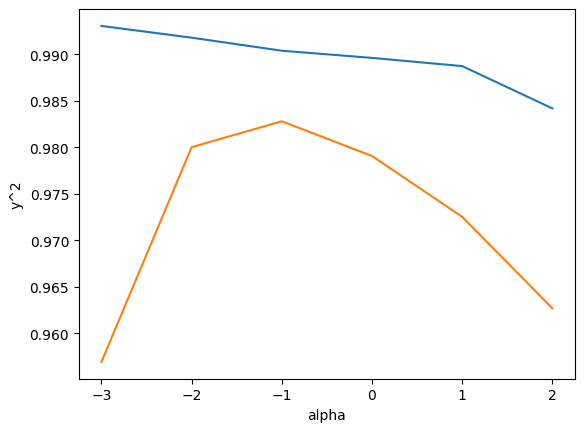

In [161]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("y^2")
plt.show()

# 결론 alpha -1, 즉 0.1일때가 가장 좋다!

In [192]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
train_score = ridge.score(train_scaled, train_target)
test_score = ridge.score(test_scaled, test_target)
print("%f / %f / %f" %(train_score, test_score, (train_score - test_score)))

0.990382 / 0.982798 / 0.007584


In [139]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [144]:
# lasso로 규제하기
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [158]:
# ridge만큼 규제가 적용되어 안정적
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [210]:
# lasso도 alpha값 조절이 가능하다!?

import matplotlib.pyplot as plt
train_score, test_score = [], []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for a in alpha_list:
  lasso = Lasso(alpha=a, max_iter=10000) # max_iter: 반복값 설정
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

print(alpha_list)
print()
print(train_score)
print()
print(test_score)

# 지정한 반복횟수가 부족하면 경고 발생


[0.001, 0.01, 0.1, 1, 10, 100]

[0.9924957354689654, 0.9922988130765112, 0.9902080238600284, 0.9898116789062786, 0.9887624603020236, 0.9078618674946646]

[0.9731817502723494, 0.9761545611184548, 0.9824382983968606, 0.9801844137326112, 0.9830309645308443, 0.9090772073024512]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


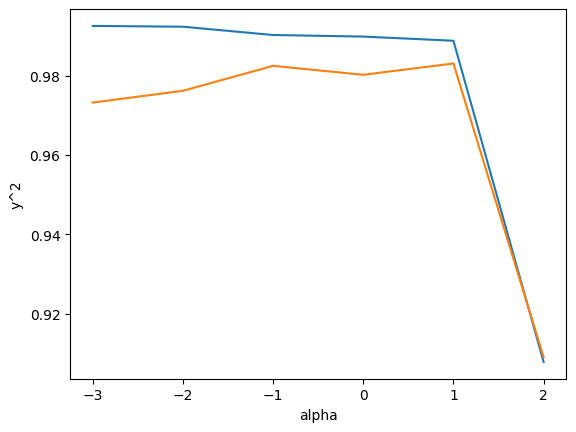

In [211]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("alpha")
plt.ylabel("y^2")
plt.show()
# 최적의 alpha 값:10

In [212]:
lasso = Lasso(alpha=10, max_iter=10000)
lasso.fit(train_scaled, train_target)
train_score = lasso.score(train_scaled, train_target)
test_score = lasso.score(test_scaled, test_target)
print("%f / %f / %f" %(train_score, test_score, (train_score - test_score)))

0.988762 / 0.983031 / 0.005731
